In [1]:
# We will see that if we have regression problem then how can we use ANN and work upon it.
# We have a dataset where, our candidates are from gre score or resume score strength data we have, and we need to check how much chance
# of admission they have.
# https://www.kaggle.com/code/campusx/gre-admission-prediction/input

In [3]:
import pandas as pd
df = pd.read_csv('/content/Admission_Predict_Ver1.1.csv')

In [4]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [5]:
df.shape

(500, 9)

In [6]:
# Check for missing value.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [7]:
df.duplicated().sum()

0

In [8]:
# We will remove serial number column, because it is not useful.
# We will also scale our values. Min Max Scaling because when we know upper bound and lower bound, then we will use min max scaling.
# Then we will create a neural network, input, hidden , output.

In [10]:
df.drop(columns = ['Serial No.'], inplace = True)

In [11]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [12]:
X = df.iloc[:, 0:-1]
y = df.iloc[:, -1]

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [14]:
X_train

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
238,310,104,3,2.0,3.5,8.37,0
438,318,110,1,2.5,3.5,8.54,1
475,300,101,3,3.5,2.5,7.88,0
58,300,99,1,3.0,2.0,6.80,1
380,322,104,3,3.5,4.0,8.84,1
...,...,...,...,...,...,...,...
255,307,110,4,4.0,4.5,8.37,0
72,321,111,5,5.0,5.0,9.45,1
396,325,107,3,3.0,3.5,9.11,1
235,326,111,5,4.5,4.0,9.23,1


In [15]:
# Min Max Scaling.
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [16]:
X_train_scaled

array([[0.4       , 0.42857143, 0.5       , ..., 0.57142857, 0.50320513,
        0.        ],
       [0.56      , 0.64285714, 0.        , ..., 0.57142857, 0.55769231,
        1.        ],
       [0.2       , 0.32142857, 0.5       , ..., 0.28571429, 0.34615385,
        0.        ],
       ...,
       [0.7       , 0.53571429, 0.5       , ..., 0.57142857, 0.74038462,
        1.        ],
       [0.72      , 0.67857143, 1.        , ..., 0.71428571, 0.77884615,
        1.        ],
       [0.2       , 0.46428571, 0.        , ..., 0.14285714, 0.32051282,
        0.        ]])

In [17]:
# Now, we need to build our neural network architecture.
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [28]:
model = Sequential()
model.add(Dense(7, activation = 'relu', input_dim = 7))
model.add(Dense(7, activation = 'relu'))
model.add(Dense(1, activation = 'linear')) # Whenever we are working with relu, our ourput activation function will be linear.

In [29]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 7)                 56        
                                                                 
 dense_3 (Dense)             (None, 7)                 56        
                                                                 
 dense_4 (Dense)             (None, 1)                 8         
                                                                 
Total params: 120 (480.00 Byte)
Trainable params: 120 (480.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [30]:
model.compile(loss = 'mean_squared_error', optimizer='Adam')

In [31]:
history = model.fit(X_train_scaled, y_train, epochs = 100, validation_split = 0.2)

Epoch 1/100
10/10 [==============================] - 1s 24ms/step - loss: 0.1988 - val_loss: 0.1635
Epoch 2/100
10/10 [==============================] - 0s 6ms/step - loss: 0.1258 - val_loss: 0.0893
Epoch 3/100
10/10 [==============================] - 0s 7ms/step - loss: 0.0697 - val_loss: 0.0401
Epoch 4/100
10/10 [==============================] - 0s 7ms/step - loss: 0.0350 - val_loss: 0.0186
Epoch 5/100
10/10 [==============================] - 0s 8ms/step - loss: 0.0239 - val_loss: 0.0145
Epoch 6/100
10/10 [==============================] - 0s 7ms/step - loss: 0.0224 - val_loss: 0.0145
Epoch 7/100
10/10 [==============================] - 0s 6ms/step - loss: 0.0216 - val_loss: 0.0135
Epoch 8/100
10/10 [==============================] - 0s 5ms/step - loss: 0.0202 - val_loss: 0.0127
Epoch 9/100
10/10 [==============================] - 0s 6ms/step - loss: 0.0192 - val_loss: 0.0122
Epoch 10/100
10/10 [==============================] - 0s 7ms/step - loss: 0.0184 - val_loss: 0.0117
Epoch 11

In [32]:
y_pred = model.predict(X_test_scaled)

4/4 [==============================] - 0s 3ms/step


In [33]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7688693568650549

We will now plot ***training_loss*** and ***validation_loss***

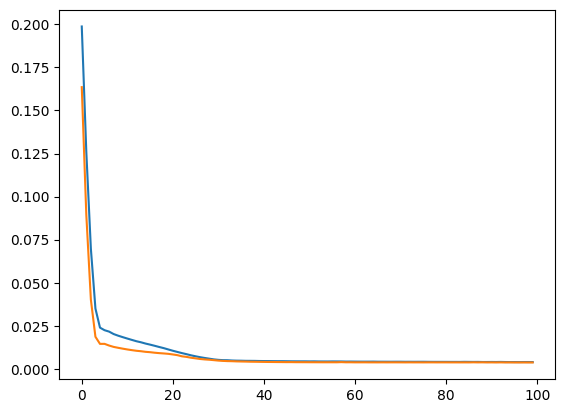

In [34]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])